In [9]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np


In [10]:
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.units = ['AU', 'yr', 'Msun']

sim.add(["Sun","Mercury","Venus","Earth","Mars"])

sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne

sim.add(["Jupiter","Saturn","Uranus","Neptune"])
sim.move_to_com()
sim.save("checkpoint.bin")


Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'NAME=1986 TO'... Found: 3753 Cruithne (1986 TO).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [11]:

sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Feb 16 2019 13:25:19
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012031139138280508 y=0.007525083029845546 z=-4.585473565544045e-05 vx=-0.0029729993102272905 vy=0.0005296510080239653 vz=7.697673539713725e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.04767381219827782 y=0.3105308647460608 z=0.020229933289819625 vx=-12.20901232085234 vy=2.0167030252064078 vz=1.2845777138602108>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.46338318774581866 y=-0.5494811664898438 z=0.018982653742945693 vx=5.630692147663027 vy=-4.751271905448326 vz=-0.39022927670570284>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9105632499821741 y=0.39870077679954313 z=-6.099054151249327e-05 vx=-2.5885283817872313 vy=-5.795613670899472 vz=0.0003473110

In [3]:
sim.status()
#widget = sim.getWidget()
#display(widget)
#sim.integrate(1000)




---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Feb 16 2019 13:25:19
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0010377821915567387 y=0.007493321292031362 z=-5.012610063327123e-05 vx=-0.002937902617112376 vy=0.0006056110662132348 vz=7.578703369622471e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.3443668457327731 y=-0.17067080513666635 z=-0.0462951133296615 vx=2.6968801249944008 vy=9.601036132615253 vz=0.5368849879358131>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.6879796788647574 y=-0.20944951066386214 z=0.03661495770819082 vx=2.172777546712054 vy=-7.077368730280796 vz=-0.22259841261107977>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.7113045602813076 y=0.6912559280347028 z=-7.911325877229079e-05 vx=-4.4635291727530735 vy=-4.550103270674196 vz=0.00029524036603

In [4]:

Noutputs = 10000
year = 1000 # One year in units where G=1
times = np.linspace(0.,year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

In [5]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
    sim.integrate(time)
    x[0][i] = ps[3].x   # Earth This stores the data which allows us to plot it later
    y[0][i] = ps[3].y
    z[0][i] = ps[3].z
    x[1][i] = ps[5].x   # Cruithne
    y[1][i] = ps[5].y
    z[1][i] = ps[5].z


0


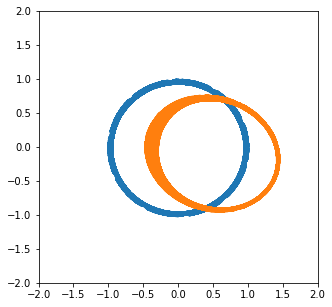

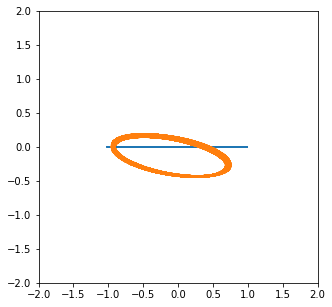

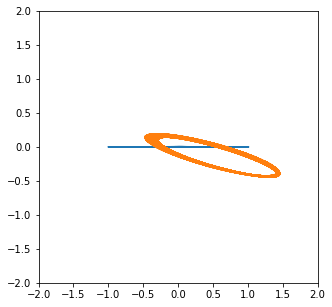

In [6]:

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

fig2 = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(y[0], z[0]);
plt.plot(y[1], z[1]);

fig3 = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x[0], z[0]);
plt.plot(x[1], z[1]);

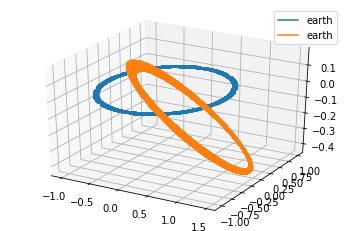

In [7]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
# fig.set_figheight(10)
# fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
#ax = fig.gca(projection='3d',s=500)
# theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# z = np.linspace(-2, 2, 100)
# r = z**2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
ax.plot(x[0], y[0], z[0], label='earth')
ax.plot(x[1], y[1], z[1], label='earth')
ax.legend()
fig.savefig("myfig.png", dpi=200)

plt.show()

<IPython.core.display.Javascript object>


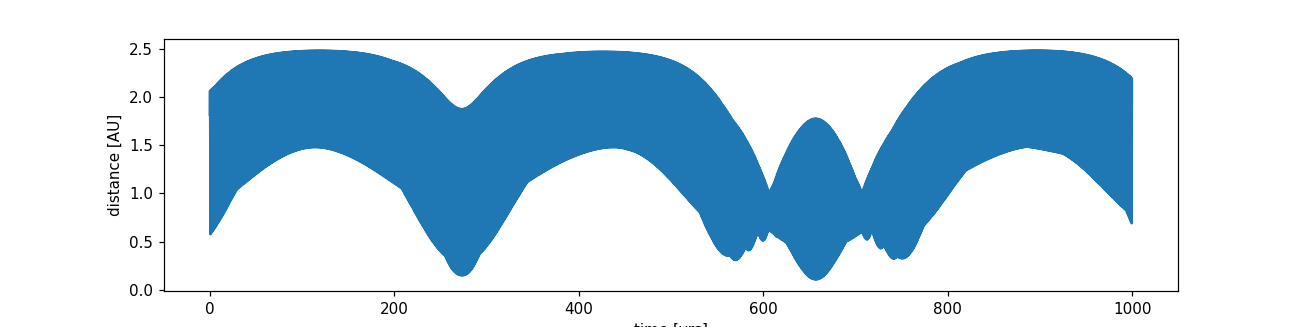

Minimum distance (0.104649 AU) occured at time: 657.465747 years.


In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
k = 100000+1000*7
plt.plot(times, distance);
closeencountertime = times[np.argmin(distance)]
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

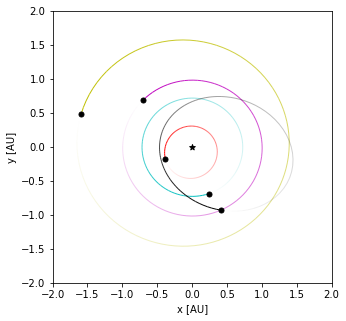

In [3]:
sim.t = 0
sim.move_to_com()
for time in np.linspace(0,10.,200):
    #print(time)
    sim.integrate(time)
    #print(sim.calculate_energy())
    fig = rebound.OrbitPlot(sim,color=True,unitlabel="[AU]",lim=2.)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)